In [1]:
# import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

In [2]:
import csv
import fivestars
import statistics
userdata = {}
moviedata = {}
i = 0
with open('ratings.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        i += 1
        if int(row['userId']) not in userdata:
            userdata[int(row['userId'])] = []
        userdata[int(row['userId'])].append(float(row['rating']))
        if int(row['movieId']) not in moviedata:
            moviedata[int(row['movieId'])] = []
        moviedata[int(row['movieId'])].append((int(row['userId']), float(row['rating'])))
        if i > 1000000:
            break

In [6]:
normratings = []
standardratings = []
count = 0
for movie in moviedata:
    normalised_user_ratings = []
    ratings = []
    for rating in moviedata[movie]:
        ratings.append(rating[1])
        user_ratings = []
        if len(userdata[rating[0]]) > 1:
            for user_rating in userdata[rating[0]]:
                user_ratings.append(user_rating)
            normalised_user_ratings.append(fivestars.translate_user_rating(rating[1], user_ratings))
    normrating = fivestars.get_normalised_rating(normalised_user_ratings)
    meanrating = statistics.mean(ratings)
    normratings.append(normrating)
    standardratings.append(meanrating)
    count += 1
    if count > 1000:
        break
"done"

'done'

In [7]:
zippedlist = list(zip(normratings, standardratings))
data = pd.DataFrame(zippedlist, columns = ['norm', 'mean'])

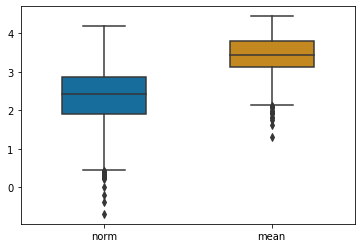

In [8]:
bplot = sns.boxplot(
                 data= data, 
                 width=0.5,
                 palette="colorblind")

In [9]:
normratings[0]

3.3792495640668347

In [10]:
standardratings[0]

4.036163522012578

In [11]:
data

,norm,mean
0,3.379250,4.036164
1,2.393390,3.371542
2,1.430100,2.815421
3,3.007184,3.799550
4,3.050831,3.916667
5,1.898003,3.093458
6,1.172628,2.647679
7,2.337262,3.385081
8,1.765219,3.069204
9,2.036539,3.168224
